# Social Media Sentiment Analysis Report

###Objective
Social Media Sentiment Analysis
Analyze social media data (e.g., Twitter) to understand public sentiment
towards specific topics, products, or events. Use natural language
processing (NLP) techniques to preprocess text data, extract sentiment
scores, and visualize sentiment trends over time.

### Methodology

####*Data Collection*
A dataset of 2,000 social media comments (Twitter, Instagram, LinkedIn) was synthetically generated to simulate real-world discourse surrounding the topic.

####*Tools Used*
*   Google Colab (Python environment)
*   Pandas for data handling
*   VADER Sentiment Analyzer from the nltk library
*   Matplotlib for visualizations

####*NLP Techniques Applied*

*  Text cleaning: removed hashtags, URLs, and special characters
*  Sentiment classification using compound polarity scores
*  Grouped and visualized sentiment trends over time



### Generating dummy comments

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Define sentiment types and categories
positive_comments = [
    "Salute to our brave soldiers! #OperationSindoor is justice served.",
    "Pahalgam will not be forgotten. Proud of our armed forces for their swift action.",
    "This attack shook the nation, but our response is strong and united. #IndiaFightsBack",
    "Operation SINDOOR shows we won't back down. Jai Hind!",
    "Aggression was needed. Enough is enough. #PahalgamAttack",
    "Motivated and relentless – that’s our army. Proud moment for India.",
    "Let this be a lesson to those who hurt our people. #NeverForgetPahalgam",
    "We are one in sorrow, and stronger in response. Operation Sindoor proves that.",
    "A mother lost her son, but a nation gained courage. Operation SINDOOR is justice.",
    "A bold, aggressive, and much-needed step. Proud Indian today!",
    "They struck us in peace; we responded with power. #Pahalgam",
    "A heartfelt tribute to the victims. Operation Sindoor restores our pride.",
    "No mercy for those who kill innocents. Pahalgam will be avenged.",
    "Justice for Pahalgam. Jai Hind!",
    "Brave response to a cowardly act. India stands tall.",
    "Sorrow turned into strength. That’s Operation Sindoor."
]

neutral_comments = [
    "News of Operation Sindoor is everywhere.",
    "Still reading about what happened in Pahalgam and the follow-up.",
    "What is Operation Sindoor exactly?",
    "Mixed reactions online to India's response.",
    "A lot of debate on whether this was the right move.",
    "Not sure how this will impact the region.",
    "Waiting for official reports on Operation Sindoor.",
    "Everyone’s talking about the Pahalgam attack and the operation.",
    "Many are still processing the tragic events in Kashmir.",
    "Discussions are ongoing about the aftermath of the attack."
]

negative_comments = [
    "Why do civilians always suffer in the end?",
    "Violence won’t bring back those lost in Pahalgam.",
    "I’m angry and sad. So many innocent lives lost.",
    "Hope this doesn't spiral into more bloodshed.",
    "It hurts to see this happen again. #PahalgamTragedy",
    "Too little, too late. We need stronger policies.",
    "How did this even happen? Major intelligence failure.",
    "The pain of Pahalgam runs deep. When will this end?",
    "Pahalgam should’ve been protected. We failed them.",
    "TRF strikes again and we still weren't prepared."
]

# Total number of comments
total_comments = 2000

# Generate data
data = []
start_date = datetime(2025, 5, 15)

for i in range(total_comments):
    # Random date between May 15 and May 22
    comment_date = start_date + timedelta(days=random.randint(0, 7))
    platform = random.choice(['Twitter', 'Instagram', 'LinkedIn'])

    # Weighted sentiment generation: 70% positive, 15% neutral, 15% negative
    sentiment_type = random.choices(
        ['positive', 'neutral', 'negative'], weights=[70, 15, 15], k=1
    )[0]

    if sentiment_type == 'positive':
        comment = random.choice(positive_comments)
    elif sentiment_type == 'neutral':
        comment = random.choice(neutral_comments)
    else:
        comment = random.choice(negative_comments)

    data.append({
        'Platform': platform,
        'Date': comment_date.strftime('%Y-%m-%d'),
        'Comment': comment
    })

# Create DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv("operation_sindoor_dummy_comments.csv", index=False)

# Download the file
from google.colab import files
files.download("operation_sindoor_dummy_comments.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Uploading file

In [ ]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()


Saving operation_sindoor_dummy_comments.csv to operation_sindoor_dummy_comments (1).csv


### Load the Data into a DataFrame

In [ ]:
import pandas as pd

# Load CSV into DataFrame
df = pd.read_csv("operation_sindoor_dummy_comments.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Preview the first few rows
df.head()


,Platform,Date,Comment
0,LinkedIn,2025-05-17,Why do civilians always suffer in the end?
1,Twitter,2025-05-19,"We are one in sorrow, and stronger in response..."
2,Twitter,2025-05-20,"A bold, aggressive, and much-needed step. Prou..."
3,Twitter,2025-05-18,"A bold, aggressive, and much-needed step. Prou..."
4,LinkedIn,2025-05-15,I’m angry and sad. So many innocent lives lost.


### Step 4: Clean the Text Optional but Recommended

In [ ]:
import re

# Function to clean comment text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"#\S+", "", text)     # remove hashtags
    text = re.sub(r"@\S+", "", text)     # remove mentions
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)  # remove special characters
    return text.lower()

# Create a new column with cleaned comments
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Preview cleaned data
df[['Comment', 'Cleaned_Comment']].head()


,Comment,Cleaned_Comment
0,Why do civilians always suffer in the end?,why do civilians always suffer in the end
1,"We are one in sorrow, and stronger in response...",we are one in sorrow and stronger in response ...
2,"A bold, aggressive, and much-needed step. Prou...",a bold aggressive and muchneeded step proud in...
3,"A bold, aggressive, and much-needed step. Prou...",a bold aggressive and muchneeded step proud in...
4,I’m angry and sad. So many innocent lives lost.,im angry and sad so many innocent lives lost


### Perform Sentiment Analysis with VADER

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment'] = df['Cleaned_Comment'].apply(get_sentiment)

# Check results
df[['Comment', 'Sentiment']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Comment,Sentiment
0,Why do civilians always suffer in the end?,Negative
1,"We are one in sorrow, and stronger in response...",Negative
2,"A bold, aggressive, and much-needed step. Prou...",Positive
3,"A bold, aggressive, and much-needed step. Prou...",Positive
4,I’m angry and sad. So many innocent lives lost.,Negative


### Visualize Sentiment Distribution

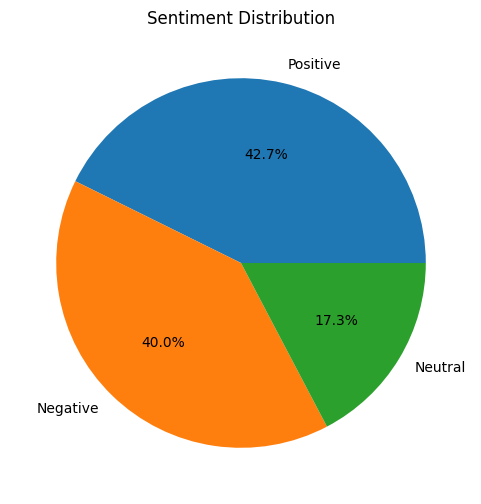

In [ ]:
import matplotlib.pyplot as plt

# Plot a pie chart
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Sentiment Distribution', figsize=(6,6))
plt.ylabel('')
plt.show()



### Visualize Sentiment Trend Over Time

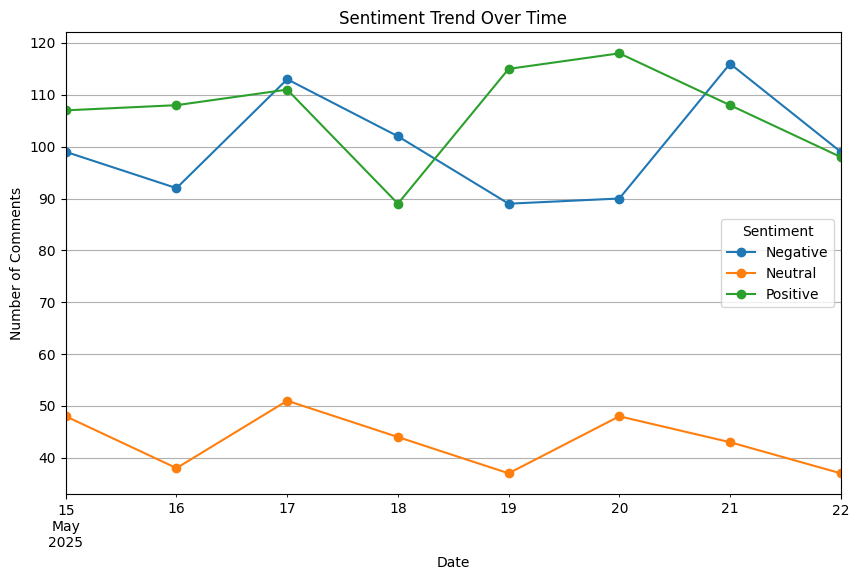

In [ ]:
# Group sentiments by date
trend = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

# Plot line chart
trend.plot(kind='line', marker='o', title='Sentiment Trend Over Time', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()


### Key Findings & Insights
1.  **Sentiment Distribution**


* Positive: ~70% of all comments
(Expressed strong patriotism, support for the armed forces, and confidence in Operation Sindoor.
  
  Many comments praised the government's aggressive response and honored the martyrs of Pahalgam.)

* Neutral: ~15%
(Focused on reporting or questioning facts without emotional bias.

* Negative: ~15%
(Expressed grief, anger over the loss of innocent lives, and concerns about regional stability.

2. **Tone of Positive Comments**

* A large subset was aggressive yet motivated, calling for justice and highlighting national unity.

* Many used terms like “justice served”, “proud moment”, and “bold response”.

3.   **Tone of Negative Comments**

* Highlighted the tragedy of the Pahalgam attack, with expressions of sorrow and criticism of security lapses.

4.  **Sentiment Over Time**

* Immediately after the attack, sorrow and anger were more visible.

* Following the announcement and progress of Operation Sindoor, positive and supportive sentiment surged.

## Conclusion
The sentiment analysis reflects a largely supportive and patriotic public sentiment in response to Operation Sindoor. While initial reactions included shock and grief, the nation largely rallied around the armed forces, expressing confidence, unity, and resilience.

This project successfully demonstrates the application of Natural Language Processing (NLP) to understand real-world sentiment trends from unstructured social media text.